# Student Depression Prediction

## Importing Necessary Libraries / Modules

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay, precision_recall_curve

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [6]:
df = pd.read_csv('Student_Depression_Dataset.csv')

In [7]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


## Investigating the Dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [9]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

## Handling Missing Data

In [12]:
df.shape

(27901, 18)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(27898, 18)

## Dropping the Feature "id"

In [15]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [16]:
df.drop(columns=['id'], inplace=True)

In [17]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Encoding of Categorical Features

### Pre-Investigation of Data

In [18]:
df.shape

(27898, 17)

In [19]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [20]:
categorical_list = list(df.select_dtypes(include='object').columns)

In [21]:
categorical_list

['Gender',
 'City',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

### Binary Mappings

In [22]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

### Ordinal Mappings

In [23]:
df['Sleep Duration'] = df['Sleep Duration'].replace({
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others': 4
})

In [24]:
df['Dietary Habits'] = df['Dietary Habits'].replace({
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 3
})

### One-hot Encoding for Nominal Categories

In [25]:
df = pd.get_dummies(df, columns=['City', 'Profession', 'Degree'], drop_first=True)

### Post-Investigation of Data

In [26]:
df.shape

(27898, 105)

In [27]:
df

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0,33.0,5.0,0.0,8.97,2.0,0.0,1,2,1,...,False,False,False,False,False,False,False,False,False,False
1,1,24.0,2.0,0.0,5.90,5.0,0.0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
2,0,31.0,3.0,0.0,7.03,5.0,0.0,0,2,0,...,False,False,False,False,False,False,False,False,False,False
3,1,28.0,3.0,0.0,5.59,2.0,0.0,2,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,5.0,0.0,5.75,5.0,0.0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
27897,0,27.0,2.0,0.0,9.40,3.0,0.0,0,2,0,...,False,False,False,False,False,False,False,True,False,False
27898,0,31.0,3.0,0.0,6.61,4.0,0.0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
27899,1,18.0,5.0,0.0,6.88,2.0,0.0,0,2,1,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Columns: 105 entries, Gender to Degree_PhD
dtypes: bool(91), float64(8), int64(6)
memory usage: 5.6 MB


In [29]:
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Columns: 105 entries, Gender to Degree_PhD
dtypes: float64(8), int64(97)
memory usage: 22.6 MB


In [31]:
df

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0,33.0,5.0,0.0,8.97,2.0,0.0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,1,24.0,2.0,0.0,5.90,5.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,0.0,7.03,5.0,0.0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,1,28.0,3.0,0.0,5.59,2.0,0.0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,25.0,4.0,0.0,8.13,3.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27.0,5.0,0.0,5.75,5.0,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
27897,0,27.0,2.0,0.0,9.40,3.0,0.0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
27898,0,31.0,3.0,0.0,6.61,4.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
27899,1,18.0,5.0,0.0,6.88,2.0,0.0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

### Target variable distribution

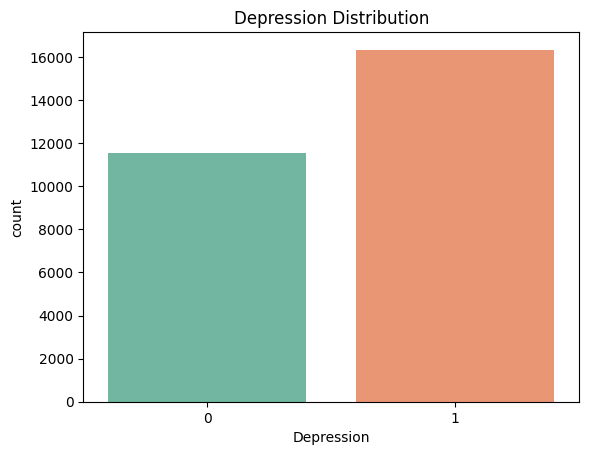

In [32]:
sns.countplot(x='Depression', data=df, palette='Set2')
plt.title("Depression Distribution")
plt.show()

### Gender vs Depression

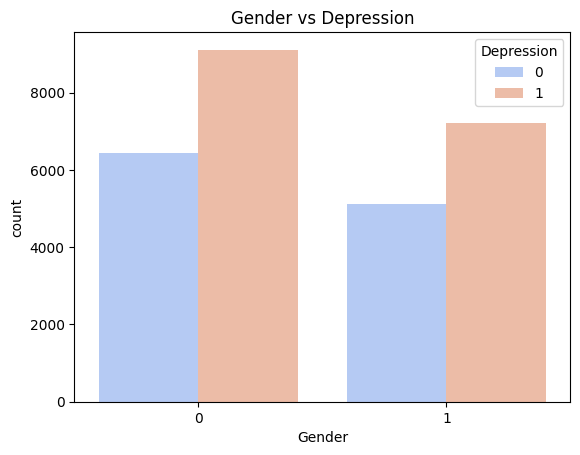

In [33]:
sns.countplot(x='Gender', hue='Depression', data=df, palette='coolwarm')
plt.title("Gender vs Depression")
plt.show()

### Sleep Duration vs Depression

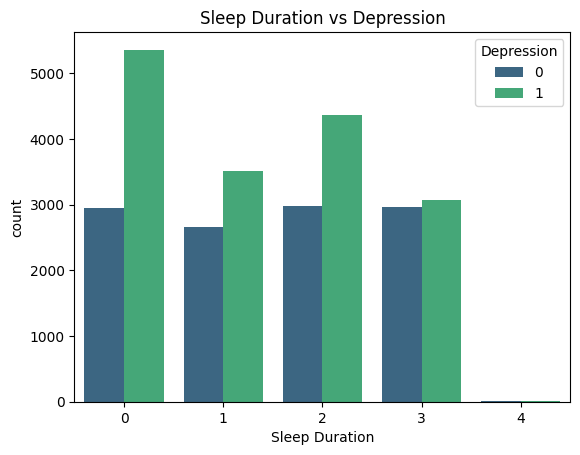

In [34]:
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='viridis')
plt.title("Sleep Duration vs Depression")
plt.show()

## Splitting of Dataset

In [35]:
X = df.drop(columns=['Depression'])
y = df['Depression']

## Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Searching for the Important Features 

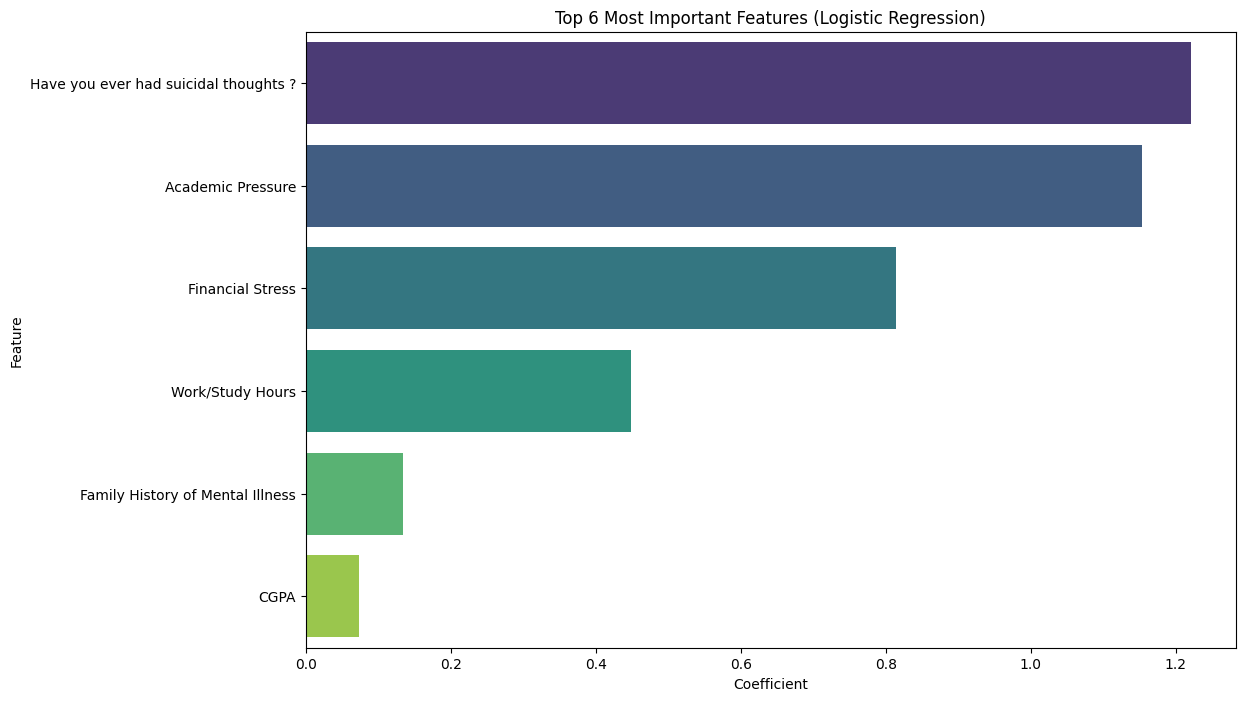

In [37]:
# Pipeline: scaling + logistic regression
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train model
clf.fit(X_train, y_train)

# Get feature importance (coefficients from logistic regression)
feature_names = X.columns 
coefficients = clf.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot top 6 features
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(6), palette='viridis')
plt.title("Top 6 Most Important Features (Logistic Regression)")
plt.show()


## Model Training

In [38]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB(alpha=1.0)
svc = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
knc = KNeighborsClassifier(n_neighbors=5, weights='uniform')
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
lrc = LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
bc = BaggingClassifier(n_estimators=100, random_state=42)
etc = ExtraTreesClassifier(n_estimators=100, max_depth=3, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

In [39]:
clfs = {
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'SVC': svc,
    'KNN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bagging': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb,
    'LGBM': lgbm
}

In [40]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [41]:
X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

In [42]:
X_train_mm = minmax_scaler.fit_transform(X_train)
X_test_mm = minmax_scaler.transform(X_test)

In [43]:
clfs_scaled = {
    'LR': LogisticRegression(solver='liblinear', penalty='l2', C=1.0, random_state=42),
    'SVC': SVC(kernel='linear', C=1.0, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    'GNB': GaussianNB(),
    'MNB': MultinomialNB(alpha=1.0),
    'BNB': BernoulliNB(alpha=1.0)
}

In [44]:
clfs_raw = {
    'DT': DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42),
    'RF': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=100, random_state=42),
    'ETC': ExtraTreesClassifier(n_estimators=100, max_depth=3, random_state=42),
    'GBDT': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGB': XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LGBM': LGBMClassifier(n_estimators=100, random_state=42)
}

In [45]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ROC-AUC
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None

    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, roc_auc, cm

In [46]:
results = []
roc_curves = {}

In [47]:
for name, clf in clfs_scaled.items():
    if name == 'MNB':  # requires non-negative values
        acc, prec, rec, f1, roc_auc, cm = train_classifier(clf, X_train_mm, y_train, X_test_mm, y_test)
    else:
        acc, prec, rec, f1, roc_auc, cm = train_classifier(clf, X_train_std, y_train, X_test_std, y_test)

    results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "ROC-AUC": roc_auc})

    if roc_auc is not None:
        y_proba = clf.predict_proba(X_test_std if name != 'MNB' else X_test_mm)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, roc_auc)

In [48]:
for name, clf in clfs_scaled.items():
    if name == 'MNB':  # requires non-negative values
        acc, prec, rec, f1, roc_auc, cm = train_classifier(clf, X_train_mm, y_train, X_test_mm, y_test)
    else:
        acc, prec, rec, f1, roc_auc, cm = train_classifier(clf, X_train_std, y_train, X_test_std, y_test)

    results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "ROC-AUC": roc_auc})

    if roc_auc is not None:
        y_proba = clf.predict_proba(X_test_std if name != 'MNB' else X_test_mm)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, roc_auc)

In [49]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

   Model  Accuracy  Precision    Recall        F1   ROC-AUC
1    SVC  0.846774   0.846258  0.846774  0.846170  0.918665
7    SVC  0.846774   0.846258  0.846774  0.846170  0.918665
6     LR  0.846595   0.846079  0.846595  0.846068  0.918349
0     LR  0.846595   0.846079  0.846595  0.846068  0.918349
5    BNB  0.824910   0.824187  0.824910  0.824108  0.895966
11   BNB  0.824910   0.824187  0.824910  0.824108  0.895966
4    MNB  0.774731   0.789516  0.774731  0.763400  0.862047
10   MNB  0.774731   0.789516  0.774731  0.763400  0.862047
8    KNN  0.756452   0.755714  0.756452  0.751905  0.817686
2    KNN  0.756452   0.755714  0.756452  0.751905  0.817686
3    GNB  0.415233   0.562219  0.415233  0.245749  0.805546
9    GNB  0.415233   0.562219  0.415233  0.245749  0.805546


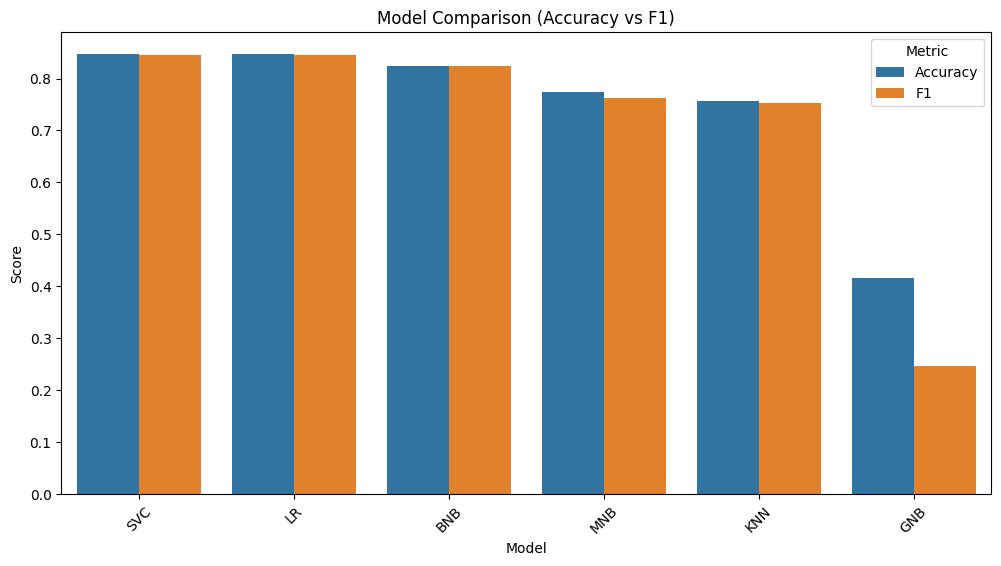

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["Accuracy", "F1"]),
            x="Model", y="value", hue="variable")
plt.title("Model Comparison (Accuracy vs F1)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()

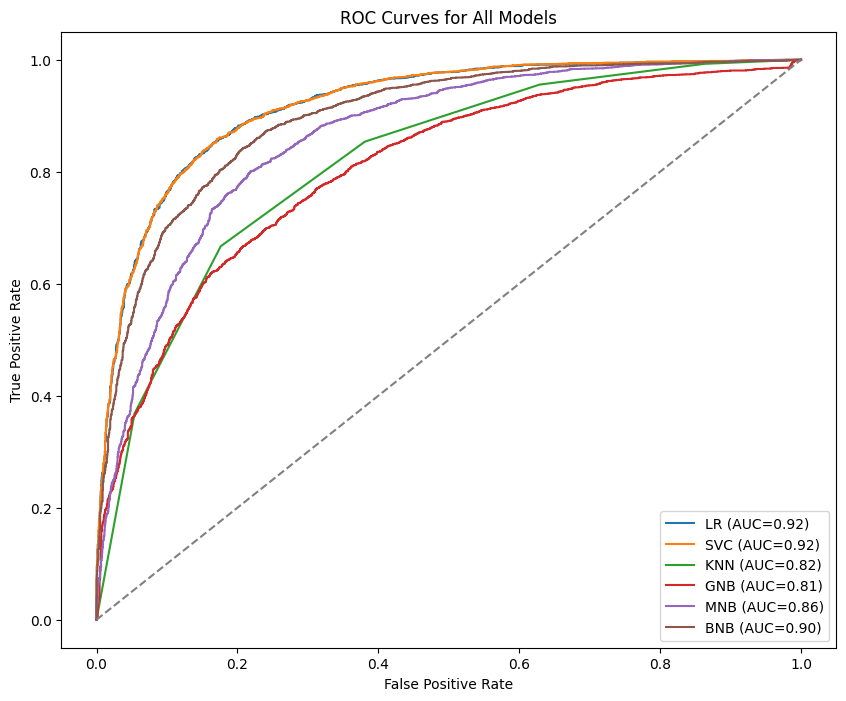

In [51]:
plt.figure(figsize=(10,8))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()

## GridSearchCV

In [52]:
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

param_grid_svc = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}

In [53]:
# grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring="accuracy")
# grid_lr.fit(X_train_std, y_train)

In [54]:
# grid_svc = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svc, cv=5, scoring="accuracy")
# grid_svc.fit(X_train_std, y_train)

In [55]:
# print("Best LR Params:", grid_lr.best_params_, "Best Accuracy:", grid_lr.best_score_)
# print("Best SVC Params:", grid_svc.best_params_, "Best Accuracy:", grid_svc.best_score_)

Best LR Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} Best Accuracy: 0.848373383864302
Best SVC Params: {'C': 0.1, 'kernel': 'linear'} Best Accuracy: 0.8486421609136693

## Voting Classifier

In [56]:
best_lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
best_svc = SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [ ]:
voting = VotingClassifier(
    estimators=[('lr', best_lr), ('svc', best_svc)],
    voting='soft',
)
voting.fit(X_train_std, y_train)

,estimators,"[('lr', ...), ('svc', ...)]"
,voting,'soft'
,weights,"[1, 2]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True


In [65]:
y_pred = voting.predict(X_test_std)

In [66]:
print("Voting Accuracy:", accuracy_score(y_test, y_pred))

Voting Accuracy: 0.8462365591397849


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2313
           1       0.86      0.88      0.87      3267

    accuracy                           0.85      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580



SVC performs better individually.

## SVC Accuracy

In [69]:
best_svc.fit(X_train_std, y_train)

,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [72]:
y_pred = best_svc.predict(X_test_std)

In [73]:
y_pred_proba = best_svc.predict_proba(X_test_std)

In [74]:
print("SVC Accuracy:", accuracy_score(y_test, y_pred))

SVC Accuracy: 0.8465949820788531


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2313
           1       0.86      0.89      0.87      3267

    accuracy                           0.85      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580



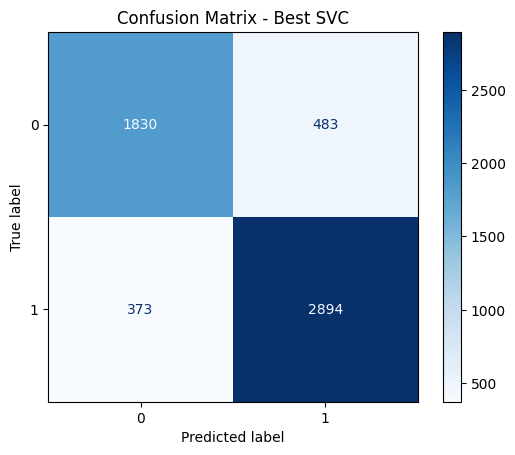

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_svc, X_test_std, y_test, cmap="Blues")
plt.title("Confusion Matrix - Best SVC")
plt.show()

In [ ]:
scores = cross_val_score(best_svc, X_train_std, y_train, cv=5, scoring="accuracy")
print("Cross-val Accuracy:", scores.mean())

Cross-val Accuracy: 0.8486421609136693


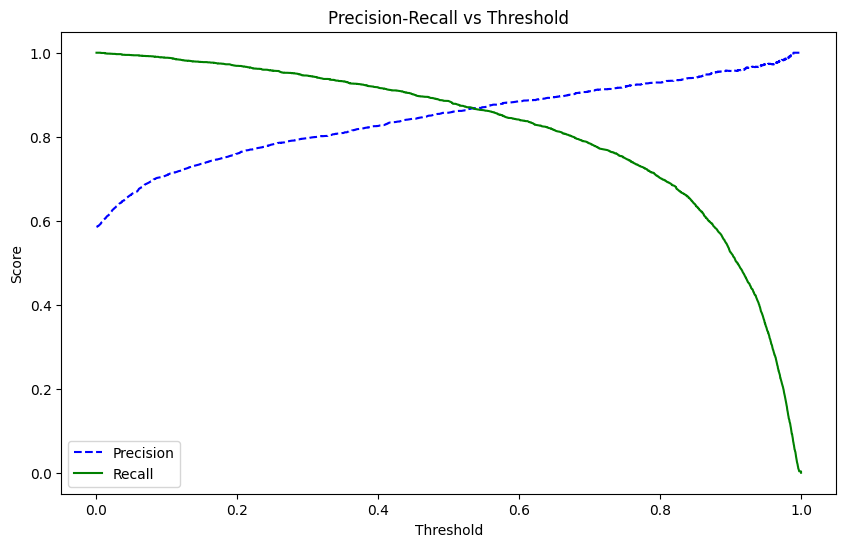

Custom Threshold (0.4) Results:
Accuracy: 0.8381720430107527
Precision: 0.8256198347107438
Recall: 0.9173553719008265
F1: 0.8690735102218355

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79      2313
           1       0.83      0.92      0.87      3267

    accuracy                           0.84      5580
   macro avg       0.84      0.82      0.83      5580
weighted avg       0.84      0.84      0.84      5580



In [ ]:
# Get predicted probabilities for class 1
y_proba = best_svc.predict_proba(X_test_std)[:, 1]

# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()

# Example: choose threshold = 0.4 (instead of 0.5)
custom_threshold = 0.4
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print("Custom Threshold (0.4) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1:", f1_score(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

In [ ]:
y_proba = best_svc.predict_proba(X_test_std)[:, 1]

best_threshold = 0.5
best_f1 = 0

# Loop through thresholds between 0 and 1
for t in np.arange(0.0, 1.01, 0.01):
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

# Evaluate with the best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Best Threshold: 0.44
Best F1 Score: 0.8717948717948718
Confusion Matrix:
 [[1752  561]
 [ 309 2958]]
Accuracy: 0.8440860215053764
Precision: 0.8405797101449275
Recall: 0.9054178145087236
F1: 0.8717948717948718

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      2313
           1       0.84      0.91      0.87      3267

    accuracy                           0.84      5580
   macro avg       0.85      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580



## Conversion into Binary Files

In [84]:
joblib.dump(best_svc, "best_svc_model.pkl")
threshold = 0.44
joblib.dump(threshold, "best_threshold.pkl")

['best_threshold.pkl']

## Author : Anshuman Dash